## Brief - An analysis of paleo-present climate data
- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
- Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats.
- For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-
coverage
- Use a Jupyter notebook for your analysis and track your progress using GitHub.
Use an academic referencing style
***

## Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

>To start, I needed to source global co2 measurements spanning some 800k years ago to present. The closest dataset matching these parameters I could find was the Luthi study, given to me by my professor Brian on the student page. The above dataset was carried out by the well-known climate science researcher Dieter Luthi and his team called "High resolution carbon dioxide concentration record 650,000- 800,000 years before present". The dataset aimed to show a very detailed record of the co2 levels over a very large time span and was obtained from the EPICA DOME C 1999 (EDC99) ice core in Antarctica. A quick look at the code below will showcase a a sharp rise in co2 emissions for the most recent sample of appprox 10k years ago to present 1950. When later fused with the manoa loa dataset, this trend only continues, but this time, in a significantly smaller time period, stressing the need for global climate action. 

>Below I load the dataset into python. Previously i exported it from  the numbers app extension on mac to csv and then the below once I had it in my repository. 

>Here is where you can download said dataset: https://www.nature.com/articles/nature06949


In [1]:
import pandas as pd

 
pd.set_option('display.max_rows', None)
csv_file_path = "Co2.csv"

df = pd.read_csv(csv_file_path)

# No NaN values
df = df.dropna(axis=1, how='all')


print(df)


         YearBP  CO2 (ppmv)  sigma mean CO2 (ppmv)
0        -51.03      368.02                   0.06
1        -48.00      361.78                   0.37
2        -46.28      359.65                   0.10
3        -44.41      357.11                   0.16
4        -43.08      353.95                   0.04
5        -42.31      353.72                   0.22
6        -41.13      352.42                   0.10
7        -39.97      350.81                   0.16
8        -39.41      349.80                   0.14
9        -38.97      349.28                   0.13
10       -38.07      347.60                   0.40
11       -37.21      345.44                   0.03
12       -36.62      344.72                   0.09
13       -36.14      343.97                   0.06
14       -35.76      343.11                   0.14
15       -34.92      342.05                   0.46
16       -33.08      341.33                   0.10
17       -33.03      339.46                   0.30
18       -29.14      334.85    

***

> Next. I needed the temperature data spanning roughly the same time span as the above co2 dataset by Luthi. Again, this was provided to me via my university's portal page by way of a direct doenload link to the Jouzel temperature data, which, like the above luthi co2 data, originate from the EPICA Dome C ice core but this one focuses on temperature ranges and ice depth measurements from 800k years ago to near pres. Jean Jouzel is a glacialologist and climatologist who is very well known in the climate field. Again, just from having a cursory look at the data below, you can see the gradual increase in the temperature recently, which will only become more aparent when I synthesise the dataset to account for the missing period of 1950-2023 aka present. 

> You can download the dataset here: https://doi.pangaea.de/10.1594/PANGAEA.683655


In [2]:
import pandas as pd

# files
temperature_csv_path = "temp.csv"

temperature_df = pd.read_csv(temperature_csv_path)

# No NaN values for cleanliness
temperature_df = temperature_df.dropna(axis=1, how='all')

# all row
pd.set_option('display.max_rows', None)

print(temperature_df)

      Depth ice/snow [m]  Age model [ka]  %[SNOW]  [DegreesC]  Sample ID
0                   0.00          -0.050      NaN         NaN          1
1                   0.55          -0.044      NaN         NaN          2
2                   1.10          -0.037      NaN         NaN          3
3                   1.65          -0.032      NaN         NaN          4
4                   2.20          -0.025      NaN         NaN          5
5                   2.75          -0.018      NaN         NaN          6
6                   3.30          -0.011      NaN         NaN          7
7                   3.85          -0.003      NaN         NaN          8
8                   4.40           0.005      NaN         NaN          9
9                   4.95           0.014      NaN         NaN         10
10                  5.50           0.022      NaN         NaN         11
11                  6.05           0.031      NaN         NaN         12
12                  6.60           0.038   -390.9  

***

Next order of business was to analyse the co2 v temp data above by time series plotting them to get visual cues as to their alignment or not. As you can see from the results, the graphs show significant overlap which makes sense as, historically:

>"Historical data as well as future climate models show that global warming is (approximately) directly proportional to the increase of CO2 concentrations in the atmosphere. More specifically: every time the CO2 concentrations rise by 10 ppm (parts per million), the mean global temperature increases by 0.1 °C." - https://factsonclimate.org/infographics/concentration-warming-relationship. This can be seen with the below plots. 

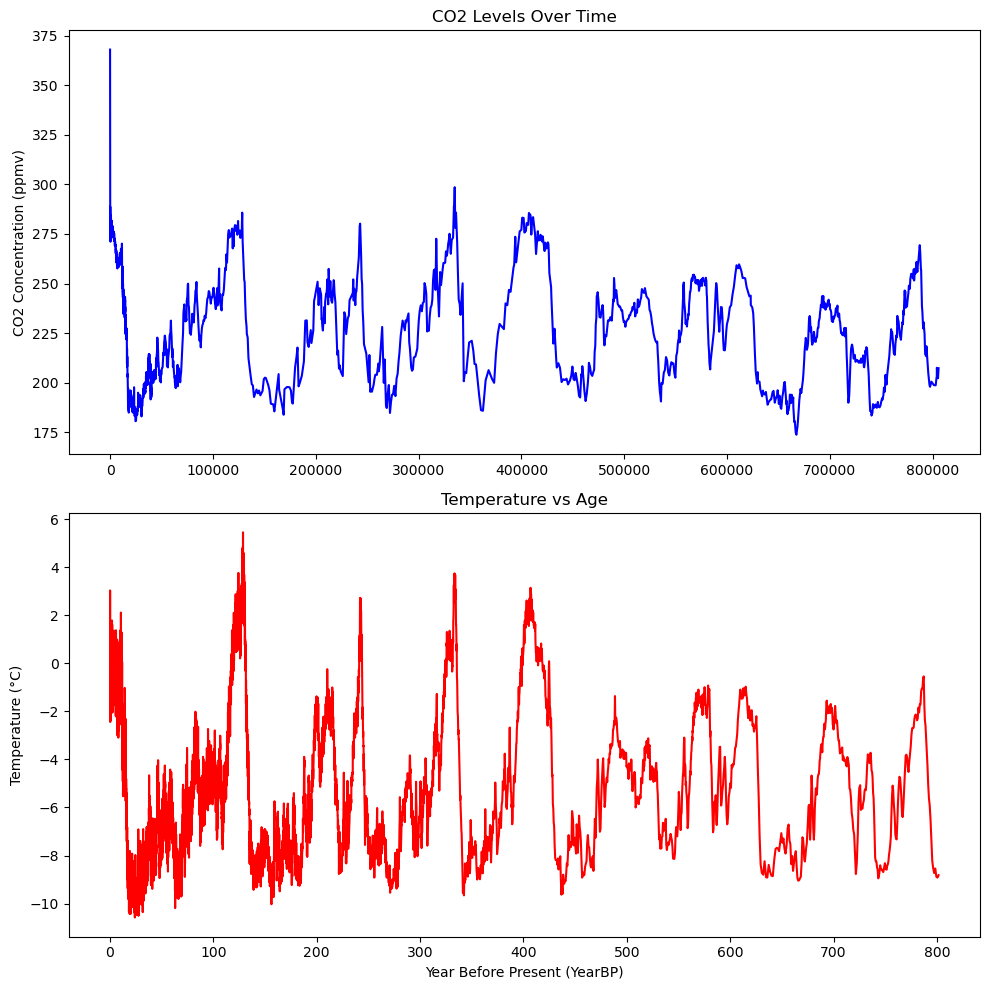

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
file_path_co2 = 'co2.CSV'  
file_path_temp = 'temp.csv'
df_co2 = pd.read_csv(file_path_co2)
df_temp = pd.read_csv(file_path_temp)

# CO2 
year_column_co2 = 'YearBP'
co2_column_co2 = 'CO2 (ppmv)'

# Temperature
age_column_temp = 'Age model [ka]'
temperature_column_temp = '[DegreesC]'  

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot CO2
ax1.plot(df_co2[year_column_co2], df_co2[co2_column_co2], linestyle='-', color='b')
ax1.set_ylabel('CO2 Concentration (ppmv)')
ax1.set_title('CO2 Levels Over Time')

# Plot Temperature
ax2.plot(df_temp[age_column_temp], df_temp[temperature_column_temp], linestyle='-', color='r')
ax2.set_xlabel('Year Before Present (YearBP)')
ax2.set_ylabel('Temperature (°C)')
ax2.set_title('Temperature vs Age')

plt.tight_layout()

# Show the plot
plt.show()

Source for below image - https://www.nature.com/articles/nature06949
Aligns perfectly with my own data loading and results of co2 and temp over 800k yeras to present. 

![Alt text](image.png)

***

> Next step was carrying out some summary stats on the co2 and temp data. I carried out max, min, mean calculations and a correlation coefficient between co2 v temp to classify how closely they aligned. The results were as follows; 

**For Temperature;**
-  Highest Temperature: 5.46°C at Age 128.662 ka
- Lowest Temperature: -10.58°C at Age 24.015 ka
- Mean Temperature: -4.577593296475467°C

**For  CO2;**
- Highest CO2 Concentration: 368.02 ppmv at YearBP -51.03
- Lowest CO2 Concentration: 173.71 ppmv at YearBP 667409.86
- Mean CO2 Concentration: 235.56669121514994 ppmv

**Correlation Coefficient of Temperature vs CO2 relationship:**
- Correlation Coefficient: 0.84540633240228

**Thoughts of the results**
- The mean overall co2 of 235 was striking given at the end of the Manoa Loa results which will be pl- otted next, the co2 levels reach greater than 420. 

- The coefficient was carried out asI wanted to carry out a statistical test that proved whqt my eyes were telling me; that co2 and temperature are positively linkied. A correlation coefficient is a statistical measure that shows you the linear relationship that exists between two variables. The score ranges from 1 - -1. A coefficient score of 1 represents a perfect positive correlation whereas -1 represents the same, but negative. The results showed a coefficient of 0.84540633240228 which indicates a high positive linear relationship, as the plot itelf shows, alongside the coefficient score. 

> Below are the code cells used to calculate the above results:


In [4]:
import pandas as pd

file_path = 'temp.csv'
df = pd.read_csv(file_path)

# highest delta
max_temp_row = df[df['[DegreesC]'] == df['[DegreesC]'].max()]

# Find the lowest
min_temp_row = df[df['[DegreesC]'] == df['[DegreesC]'].min()]

# mean 
mean_temp_value = df['[DegreesC]'].mean()

# Extract information
max_temp_age = max_temp_row['Age model [ka]'].values[0]
min_temp_age = min_temp_row['Age model [ka]'].values[0]
max_temp_value = max_temp_row['[DegreesC]'].values[0]
min_temp_value = min_temp_row['[DegreesC]'].values[0]

# Print results
print(f'Highest Temperature: {max_temp_value}°C at Age {max_temp_age} ka')
print(f'Lowest Temperature: {min_temp_value}°C at Age {min_temp_age} ka')
print(f'Mean Temperature: {mean_temp_value}°C')

Highest Temperature: 5.46°C at Age 128.662 ka
Lowest Temperature: -10.58°C at Age 24.015 ka
Mean Temperature: -4.577593296475467°C


In [5]:
import pandas as pd

file_path = 'co2.csv'
df = pd.read_csv(file_path)

max_co2_row = df[df['CO2 (ppmv)'] == df['CO2 (ppmv)'].max()]
min_co2_row = df[df['CO2 (ppmv)'] == df['CO2 (ppmv)'].min()]
mean_co2_value = df['CO2 (ppmv)'].mean()

max_co2_year = max_co2_row['YearBP'].values[0]
min_co2_year = min_co2_row['YearBP'].values[0]
max_co2_value = max_co2_row['CO2 (ppmv)'].values[0]
min_co2_value = min_co2_row['CO2 (ppmv)'].values[0]

print(f'Highest CO2 Concentration: {max_co2_value} ppmv at YearBP {max_co2_year}')
print(f'Lowest CO2 Concentration: {min_co2_value} ppmv at YearBP {min_co2_year}')
print(f'Mean CO2 Concentration: {mean_co2_value} ppmv')


Highest CO2 Concentration: 368.02 ppmv at YearBP -51.03
Lowest CO2 Concentration: 173.71 ppmv at YearBP 667409.86
Mean CO2 Concentration: 235.56669121514994 ppmv


In [6]:
import pandas as pd
from scipy.stats import pearsonr

file_path_temp = 'temp.csv'
file_path_co2 = 'co2.csv'
df_temp = pd.read_csv(file_path_temp)
df_co2 = pd.read_csv(file_path_co2)

temperature_column_temp = '[DegreesC]' 
co2_column_co2 = 'CO2 (ppmv)'

# Merged
df_merged = pd.merge(df_temp, df_co2, left_on='Age model [ka]', right_on='YearBP', how='inner')

# Drop missing rows
df_temp_co2 = df_merged[[temperature_column_temp, co2_column_co2]].dropna()

# correlation coefficient
corr_coefficient, _ = pearsonr(df_temp_co2[temperature_column_temp], df_temp_co2[co2_column_co2])

print(f'Correlation Coefficient: {corr_coefficient}')

Correlation Coefficient: 0.84540633240228


***

>Next  step was to find a dataset that would help fill in the missing peices from the others aka from 1950 - 2023 or present day.

 For co2, I opted for the widely available Manoa Loa co2 dataset which spans from 1958 to 2023, exactly what was needed. The dataset itself consists of measurements of atmospheric co2 emissions which were taken on site in Hawaii, in the Mauna Loa Observatory, thus the datasets name. 
 
 Below, I will start by simply plotting this dataset to get an idea of it trends etc. From below, it can be clearly seen that co2 is rising consistently through the datsets years. 

- The growth rate seems to be increasing year by year
- Emissions were approximately 300 ppm in the 1950 to the current 430, a staggering 40 percent increse in just 60 or so years. 

For context, according to my above co2 data set spanning 800k years, co2 emissions acorss those ancient times regularly peaked in the 250-300 range, but, crucially, this was then proceeded by a fall to approximately 150-200, which is typical of Earth's orbital cycles -  https://climate.nasa.gov/explore/ask-nasa-climate/2949/why-milankovitch-orbital-cycles-cant-explain-earths-current-warming/. However, according to NASA and the scientific community, Earth's current orbital position lends itself to a cooling off period right now yet we are seeing quite the opposite - https://climate.nasa.gov/explore/ask-nasa-climate/2949/why-milankovitch-orbital-cycles-cant-explain-earths-current-warming/. From the 1850 revolution onwards with a particular emphasis on 1950 onwards, Earth's co2 and temps are skyrocketing (relatively) as showcased by the datasets so far and to come. 

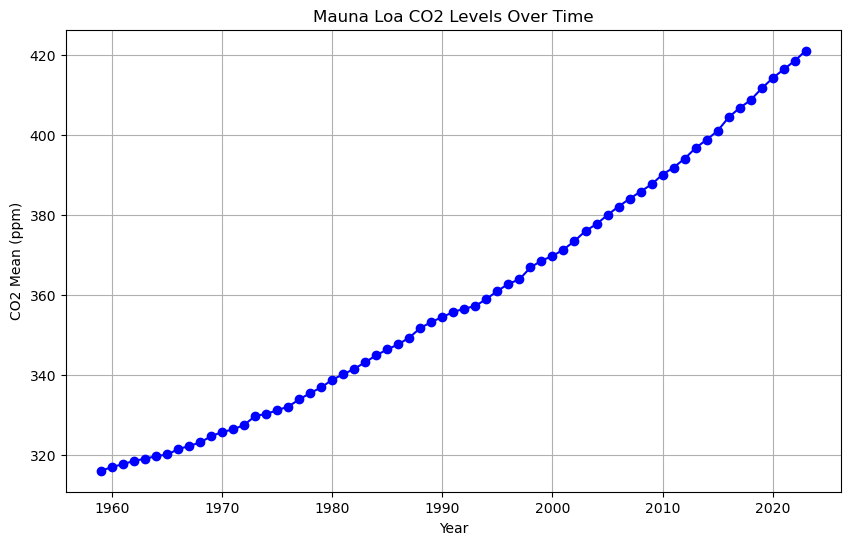

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('manoaloa.csv')

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('CO2 Mean (ppm)')
plt.title('Mauna Loa CO2 Levels Over Time')
plt.grid(True)
plt.show()

***

## Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

> Next I needed to analyse one additional paleo dataset, ideally of around the same time span. For this; I elected for simplicity and opted to examine the ice/snow depth in the already loaded co2file i had. Handy. The results were pretty simple and didn't offer too much opportunity for plots; 

**As shown below; there has been an accumulation of more than 3000 metres of snow/ice in the space of the time period of 800,000 years.**

- Below code also *attempts* to synthesise this dataset so that it is current. Didn't look great in then plot, but i'm unsure if I even needed to attempt it. 

- The code below analyses the relationship between the ice depth and the age and then attempts a ploynomial regression based off the 800k dataset and synthesises the 1950-modern timetable. Plot looks terrible regarding that synthesis, but I an unsure if it could really look any different considering 0 was the depth in 1950 so synthesising it made my head explode. 

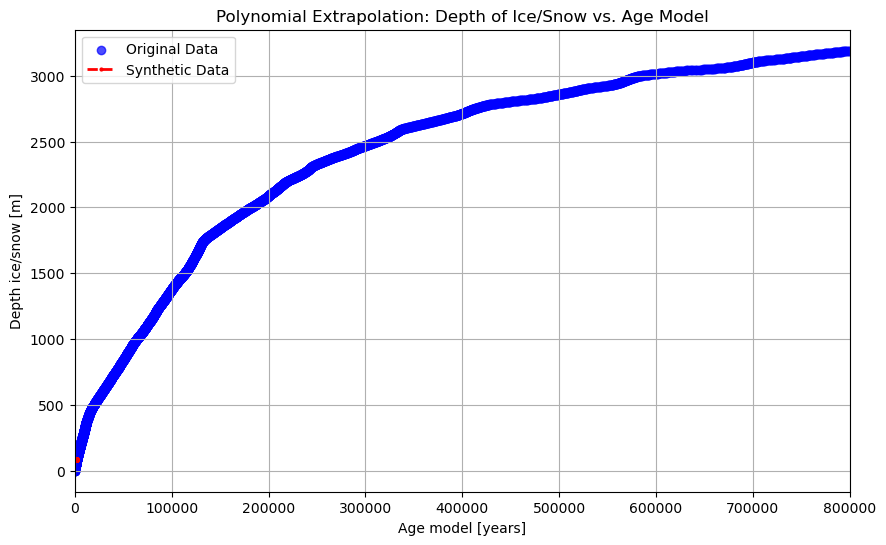

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the original CSV file
df = pd.read_csv('icedepth.csv')

# only columns needed 
depth_column = 'Depth ice/snow [m]'
age_column = 'Age model [ka]'


df[age_column] = df[age_column] * 1000  # Convert from ka to years


pre_1950_data = df[df[age_column] < 1950]

# polynomial regression
degree = 2  # You can adjust the degree of the polynomial
coefficients = np.polyfit(pre_1950_data[age_column], pre_1950_data[depth_column], degree)
poly_func = np.poly1d(coefficients)

# syn (1950-2023)
desired_years = np.arange(1950, 2024, 0.001)  # Adjust the step size as needed
synthetic_depths = poly_func(desired_years)

# Plot og and syn data
plt.figure(figsize=(10, 6))
plt.scatter(df[age_column], df[depth_column], marker='o', color='blue', alpha=0.7, label='Original Data')
plt.plot(desired_years, synthetic_depths, linestyle='--', color='red', linewidth=2, marker='o', markersize=2, label='Synthetic Data')
plt.xlabel('Age model [years]')
plt.ylabel('Depth ice/snow [m]')
plt.title('Polynomial Extrapolation: Depth of Ice/Snow vs. Age Model')

# 800k in yrs
plt.xlim([0, 800000])
plt.legend()
plt.grid(True)
plt.show()

# Save to json for brief JSON file
df.to_json('icedepth.json')


***

## Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats.

**Next is the dataset fusing stage of historic and modern datasets**
- I started with Co2 and fused togtether my Luthi 800k dataset with the Manoa Loa to get a full 800k to present dataset on the co2 span over that time. I did find this tricky but went about it as follows; 

- I started by gutting the unneeded columns from the two datasets and only kept what was necessary; the mean and year. Then i ensured my two unfused datasets had the same column names, to achieve this, I renamed themnYearBP and Mean so the code could fuse them and the vital data as one. Now, this brought about challenges given one scale is in 800,000s of years and other a mere 70. I did not know how to solve this but the plot is still effective as the Manoa loa data is highly distinct as its emissions are so high so even though it represents a tiny relative period, its distinct enough to actively plot as part of a fised 1 complete datasett. 

- Also, i reversed the order by indicating ascending=false as I wanted the fused data to correctly align with 2023-800k years ago. 

**Sources essential for the above:**
- [combining-dataframes-Stackoverflow](https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes)

- [merging: How to](https://realpython.com/pandas-merge-join-and-concat/)

- Stackoverflow was very helpful for some of the code blocks

- I had merged before in a different module, but I had extreme error troubles for the project all thanks to invisible line spacing column errors, special characters, file naming conventions etc. I also, as stated already, found it too hard to solve the time span differences between the two datasets when it came to plotting. All that being said, I still managed to merge them together successfully and plotted the results as seen below. 

In [9]:
import pandas as pd

# datasets with only 'YearBP' and 'Mean'
df1_selected = pd.read_csv('fusedco2.csv')
df2_selected = pd.read_csv('manoaloafused_selected.csv')

# reverse order for greater 'legibility'
df2_selected = df2_selected.sort_values(by='YearBP', ascending=False)

# fuse
merged_selected_df = pd.concat([df2_selected, df1_selected])


merged_selected_df.to_csv('fusedc02.csv', index=False)


pd.set_option('display.max_rows', None)
print(merged_selected_df)

         YearBP    Mean
64      2023.00  421.08
63      2022.00  418.53
62      2021.00  416.41
61      2020.00  414.21
60      2019.00  411.65
59      2018.00  408.72
58      2017.00  406.76
57      2016.00  404.41
56      2015.00  401.01
55      2014.00  398.81
54      2013.00  396.74
53      2012.00  394.06
52      2011.00  391.85
51      2010.00  390.10
50      2009.00  387.64
49      2008.00  385.83
48      2007.00  384.02
47      2006.00  382.09
46      2005.00  379.98
45      2004.00  377.70
44      2003.00  375.98
43      2002.00  373.45
42      2001.00  371.32
41      2000.00  369.71
40      1999.00  368.54
39      1998.00  366.84
38      1997.00  363.88
37      1996.00  362.74
36      1995.00  360.97
35      1994.00  358.96
34      1993.00  357.21
33      1992.00  356.54
32      1991.00  355.70
31      1990.00  354.45
30      1989.00  353.20
29      1988.00  351.69
28      1987.00  349.31
27      1986.00  347.61
26      1985.00  346.35
25      1984.00  344.87
24      1983.00 

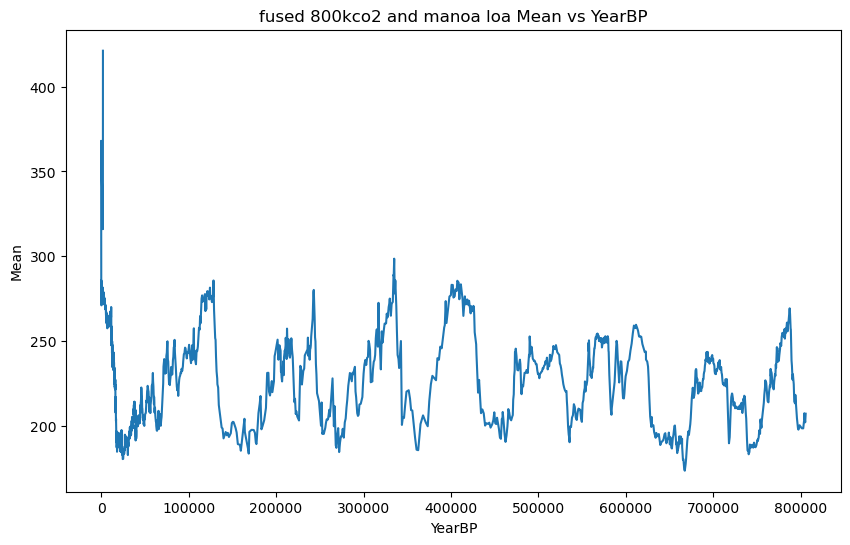

In [10]:
plt.figure(figsize=(10,6))
plt.plot(merged_selected_df['YearBP'], merged_selected_df['Mean'])
plt.xlabel('YearBP')
plt.ylabel('Mean')
plt.title('fused 800kco2 and manoa loa Mean vs YearBP')
plt.show()

>As you can see from the above merged plot, the Manoa Loa data - despite being so tiny in a scale of 800k years, is very distinct as it stands alone with co2 ppm rising over 400. The dataset is complete abd modern with the merger. 

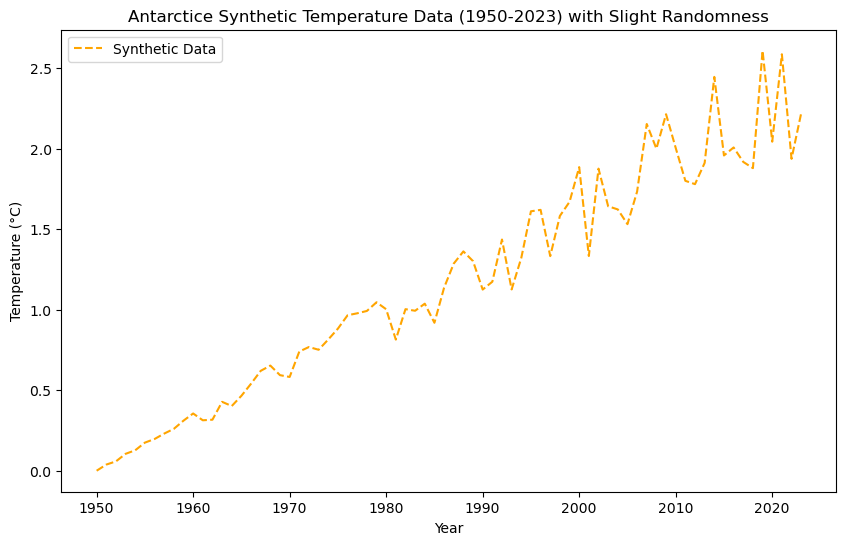

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the warming rate
warming_rate_low = 0.022  # Adjusted for a constant warming rate per year
warming_rate_high = 0.032

# Other datasets cease at 1950 so needed somethung else to get to 'present'
years_1950_to_2023 = 2023 - 1950


base_synthetic_temperatures = np.linspace(0, years_1950_to_2023 * warming_rate_high, years_1950_to_2023 + 1)
synthetic_temperatures = base_synthetic_temperatures + np.random.uniform(-0.2 * base_synthetic_temperatures, 0.2 * base_synthetic_temperatures)

synthetic_index = np.arange(1950, 2024)


synthetic_df = pd.DataFrame({'Synthetic_Temperature': synthetic_temperatures}, index=synthetic_index)

# Plot the synthetic data with a bit of randomness
plt.figure(figsize=(10, 6))
plt.plot(synthetic_index, synthetic_df['Synthetic_Temperature'], label='Synthetic Data', linestyle='--', color='orange')
plt.title('Antarctice Synthetic Temperature Data (1950-2023) with Slight Randomness')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [12]:
import pandas as pd

file_path_original = 'newtemp.csv'
original_df = pd.read_csv(file_path_original)


file_path_synthetic = 'synthtemp.csv'
synthetic_df = pd.read_csv(file_path_synthetic)

synthetic_df = synthetic_df.sort_values(by='Year', ascending=False)


fused_df = pd.concat([synthetic_df, original_df])


fused_df.to_csv('new_fused_temperature_data.csv', index=False)

# fused DataFr
print(fused_df)

          Year   DegreesC
73    2023.000   2.635421
72    2022.000   1.944159
71    2021.000   2.714223
70    2020.000   2.140730
69    2019.000   2.384639
68    2018.000   1.952849
67    2017.000   1.938830
66    2016.000   2.077487
65    2015.000   2.403719
64    2014.000   1.804939
63    2013.000   2.021467
62    2012.000   1.600228
61    2011.000   1.753722
60    2010.000   2.142145
59    2009.000   1.952557
58    2008.000   1.775468
57    2007.000   1.941574
56    2006.000   1.446330
55    2005.000   1.924036
54    2004.000   1.433184
53    2003.000   1.991227
52    2002.000   1.568797
51    2001.000   1.618154
50    2000.000   1.741266
49    1999.000   1.521170
48    1998.000   1.693500
47    1997.000   1.225623
46    1996.000   1.242008
45    1995.000   1.376432
44    1994.000   1.222330
43    1993.000   1.643647
42    1992.000   1.246673
41    1991.000   1.119138
40    1990.000   1.521993
39    1989.000   1.411380
38    1988.000   1.275379
37    1987.000   1.357247
36    1986.0

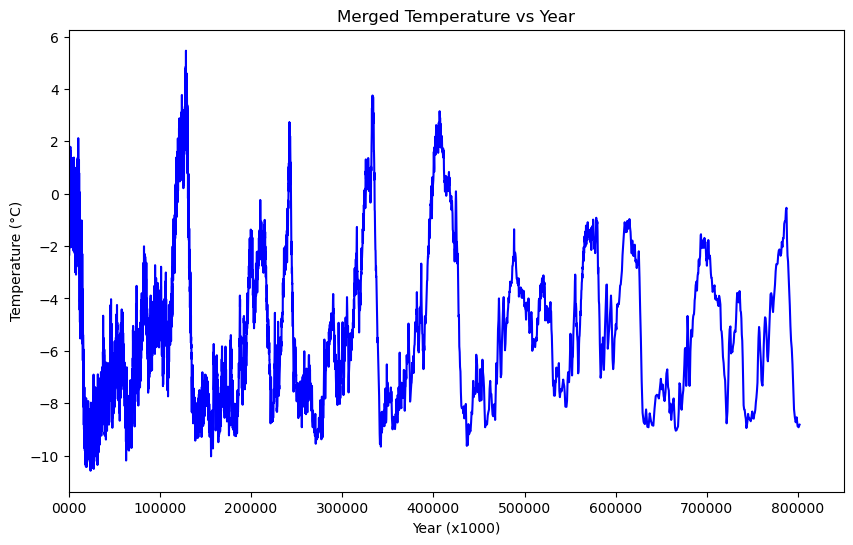

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('new_fused_temperature_data.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df[' DegreesC'], label='Temperature', color='blue')
plt.xlabel('Year (x1000)')
plt.ylabel('Temperature (°C)')
plt.title('Merged Temperature vs Year')

# limits
plt.xlim(0, 850)

# x axis in thousands of years aka x1000
plt.xticks([x for x in range(0, 851, 100)], labels=[f'{x}000' for x in range(0, 851, 100)])

plt.show()

In [29]:
import pandas as pd

# Load the original CSV file
df = pd.read_csv('icedepth.csv')


selected_columns = ['Depth ice/snow [m]', 'Age model [ka]']
df_selected = df[selected_columns]


df_selected.to_csv('ice_depth_selected.csv', index=False)


***

## CSV AND JSONS OF THE FUSED DATASETS

> Here is the code used to make jSON files out of the already made CSVs.

In [30]:
import pandas as pd

# Csv
df = pd.read_csv('fusedco2.csv')

# Convert 2 JSON 
df.to_json('fusedco2.json', orient='records', lines=True)

In [31]:
import pandas as pd

# csv
df = pd.read_csv('TTEMP.csv')

# Convert it  jsonSON 
df.to_json('TTEMP.json', orient='records', lines=True)


In [32]:
#Save the DataFrame to a JSON file
df.to_json('icedepth.json')


***

## Examine Irish context: Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)

> From an Irish POV - I wanted to make it as simple as possible as I found manipulating these datasets to be extremely difficult and error shrewn. Firstly, I researched the Maynooth study as mentioned in the brief. The study, "The Emergence of a Climate Signal in Long Term Meteorological Observations" was a study conducted this year - 2023 - well, last year now - that examined many weather measurements across many weather stations across Ireland oer a period of 150 years. To summarise, their findings that are relevant to this project were; 

-  Ireland, like everywhere else, is currently experiencing global warming. 
- What I found most informative was this line: 'Warming at the island scale is estimated at 0.88°C per degree warming in Global Mean Surface Temperature (GMST'. This is telling us that for every degree of temperature increase globally, Ireland will increase by .88C. 
- Essentially, Ireland is unfortunately not isolated from gloabal warming, althought it is at a slightly lesser extent than the global average. 

>Taking these findings into account; I found an Irish dataset spanning from 1990-2022 that covers Irish temperature means over that period. The dataset can be found here; https://www.met.ie/climate/what-we-measure/temperature#top

I carried out the below analysis of the met database:

- Plot the dataset to see its trends
- Print the yearly temp averages one after another to see the exact trend increase more slowly. 
- Carry out a Trend line and Moving average line plot to once again visualise what has been visualised all throughout this project whether it be a global or Irish perspective; mean yearly temperatures are on the rise and have been, are currently - and will continue to - rise drammatically. 

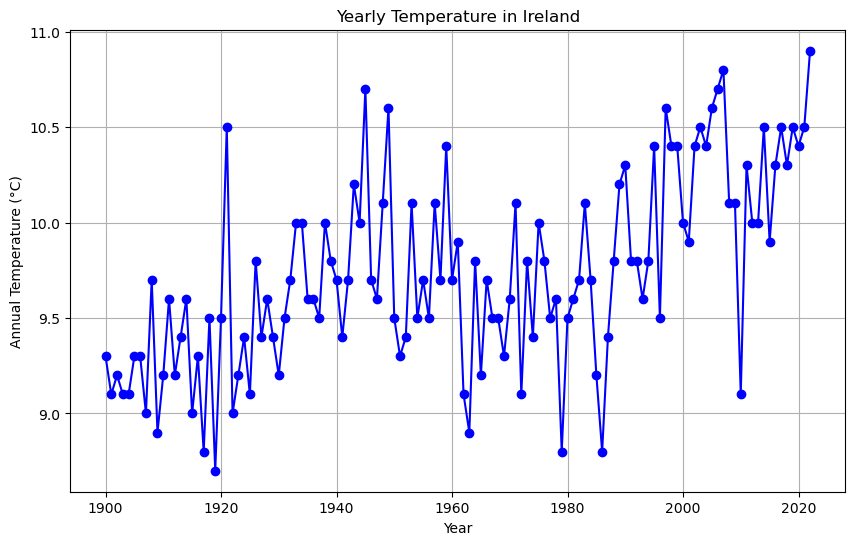

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'irishtemps.csv'  
df = pd.read_csv(file_path)

year_column = 'year'
temperature_column = 'Annual'


plt.figure(figsize=(10, 6))
plt.plot(df[year_column], df[temperature_column], marker='o', linestyle='-', color='b')


plt.xlabel('Year')
plt.ylabel('Annual Temperature (°C)')
plt.title('Yearly Temperature in Ireland')

# Show the plot
plt.grid(True)
plt.show()

In [34]:
import pandas as pd

file_path = 'irishtemps.csv'
df = pd.read_csv(file_path)

year_column = 'year'
temperature_column = 'Annual'

mean_temperature_by_year = df.groupby(year_column)[temperature_column].mean().reset_index()

print("Year\tMean Temperature (°C)")
for index, row in mean_temperature_by_year.iterrows():
    print(f"{int(row[year_column])}\t{row[temperature_column]:.2f}")


Year	Mean Temperature (°C)
1900	9.30
1901	9.10
1902	9.20
1903	9.10
1904	9.10
1905	9.30
1906	9.30
1907	9.00
1908	9.70
1909	8.90
1910	9.20
1911	9.60
1912	9.20
1913	9.40
1914	9.60
1915	9.00
1916	9.30
1917	8.80
1918	9.50
1919	8.70
1920	9.50
1921	10.50
1922	9.00
1923	9.20
1924	9.40
1925	9.10
1926	9.80
1927	9.40
1928	9.60
1929	9.40
1930	9.20
1931	9.50
1932	9.70
1933	10.00
1934	10.00
1935	9.60
1936	9.60
1937	9.50
1938	10.00
1939	9.80
1940	9.70
1941	9.40
1942	9.70
1943	10.20
1944	10.00
1945	10.70
1946	9.70
1947	9.60
1948	10.10
1949	10.60
1950	9.50
1951	9.30
1952	9.40
1953	10.10
1954	9.50
1955	9.70
1956	9.50
1957	10.10
1958	9.70
1959	10.40
1960	9.70
1961	9.90
1962	9.10
1963	8.90
1964	9.80
1965	9.20
1966	9.70
1967	9.50
1968	9.50
1969	9.30
1970	9.60
1971	10.10
1972	9.10
1973	9.80
1974	9.40
1975	10.00
1976	9.80
1977	9.50
1978	9.60
1979	8.80
1980	9.50
1981	9.60
1982	9.70
1983	10.10
1984	9.70
1985	9.20
1986	8.80
1987	9.40
1988	9.80
1989	10.20
1990	10.30
1991	9.80
1992	9.80
1993	9.60
1994	9.80
1995	1

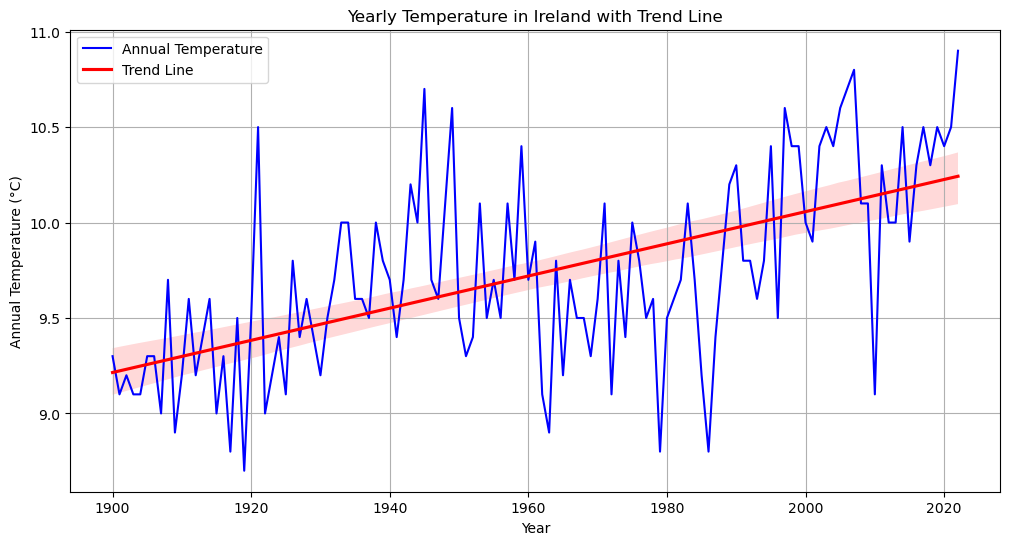

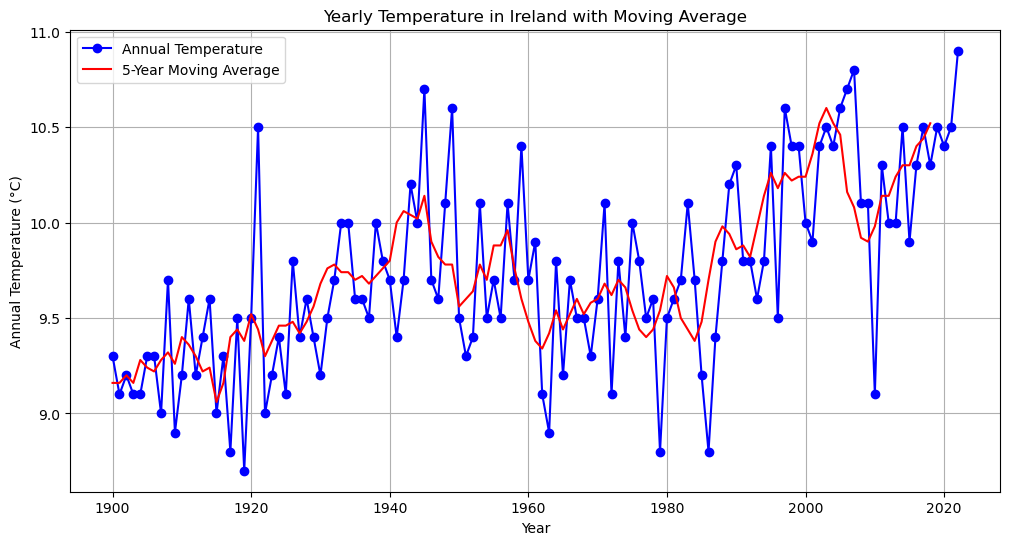

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'irishtemps.csv'  
df = pd.read_csv(file_path)

# 
df.columns = df.columns.str.strip()

# col names
year_column = 'year'
temperature_column = 'Annual'

# tim series and trend line
plt.figure(figsize=(12, 6))
sns.lineplot(x=df[year_column], y=df[temperature_column], label='Annual Temperature', color='b')
sns.regplot(x=df[year_column], y=df[temperature_column], scatter=False, label='Trend Line', color='r')
plt.xlabel('Year')
plt.ylabel('Annual Temperature (°C)')
plt.title('Yearly Temperature in Ireland with Trend Line')
plt.legend()
plt.grid(True)
plt.show()

# moving average
window_size = 5 
df['Moving_Average'] = df[temperature_column].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df[year_column], df[temperature_column], marker='o', linestyle='-', color='b', label='Annual Temperature')
plt.plot(df[year_column], df['Moving_Average'], color='r', label=f'{window_size}-Year Moving Average')
plt.xlabel('Year')
plt.ylabel('Annual Temperature (°C)')
plt.title('Yearly Temperature in Ireland with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


plt.show()


***

## For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis)

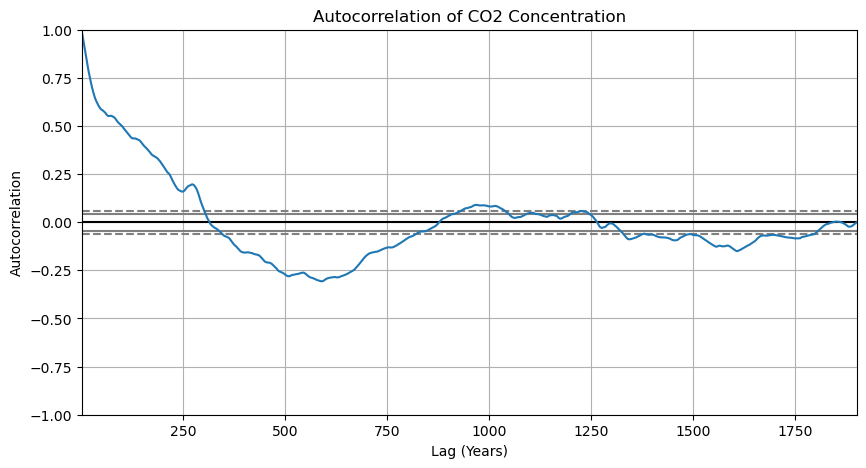

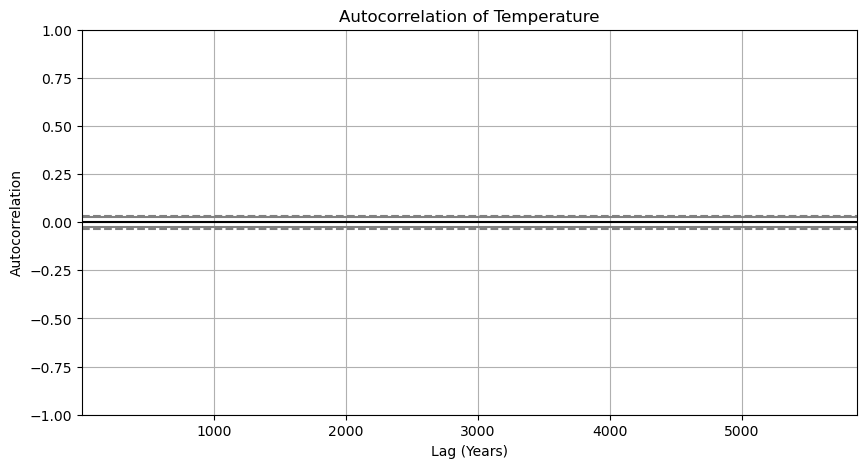

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Load CO2 data
file_path_co2 = 'co2.CSV'
df_co2 = pd.read_csv(file_path_co2)
co2_column_co2 = 'CO2 (ppmv)'


file_path_temp = 'TTEMP.csv'
df_temp = pd.read_csv(file_path_temp)
temperature_column_temp = 'DegreesC'

# Plot autocorrelation for CO2
plt.figure(figsize=(10, 5))
autocorrelation_plot(df_co2[co2_column_co2])
plt.title('Autocorrelation of CO2 Concentration')
plt.xlabel('Lag (Years)')
plt.ylabel('Autocorrelation')
plt.show()

# Plot auto for Temp but not sure its working for temp
plt.figure(figsize=(10, 5))
autocorrelation_plot(df_temp[temperature_column_temp], color='orange')
plt.title('Autocorrelation of Temperature')
plt.xlabel('Lag (Years)')
plt.ylabel('Autocorrelation')
plt.show()


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
co2_unfused_df = pd.read_csv('fusedco2.csv')

print(co2_unfused_df.head())

# 'Mean'
mean_column_name = 'Mean'
print("\nDescriptive Statistics for 'Mean':")
print(co2_unfused_df[mean_column_name].describe())




   YearBP    Mean
0  2023.0  421.08
1  2022.0  418.53
2  2021.0  416.41
3  2020.0  414.21
4  2019.0  411.65

Descriptive Statistics for 'Mean':
count    1966.000000
mean      239.656226
std        42.043945
min       173.710000
25%       205.652500
50%       233.910000
75%       262.600000
max       421.080000
Name: Mean, dtype: float64


In [38]:
import pandas as pd

ttemp_df = pd.read_csv('TTEMP.csv')
degrees_c_column_name = ' DegreesC'.strip()
year_column_name = 'Year'

print("\nDescriptive Statistics for 'DegreesC':")
print(ttemp_df[degrees_c_column_name].describe())


print("\nDescriptive Statistics for 'Year':")
print(ttemp_df[year_column_name].describe())




Descriptive Statistics for 'DegreesC':
count    5862.000000
mean       -4.505138
std         3.486490
min       -10.580000
25%        -7.430000
50%        -5.150000
75%        -1.660000
max         5.460000
Name: DegreesC, dtype: float64

Descriptive Statistics for 'Year':
count    5874.000000
mean      212.648289
std       277.065207
min        -0.050000
25%        47.122750
50%       123.302000
75%       284.225250
max      2023.000000
Name: Year, dtype: float64


In [39]:
import pandas as pd


ice_depth_df = pd.read_csv('icedepth.csv')
print(ice_depth_df.head())

# atrocious white space removing causing me an aneurism
corrected_columns = [col.strip() for col in ice_depth_df.columns]


print("\nCorrected Column Names:")
print(corrected_columns)

# only necessary columns
depth_column_name = 'Depth ice/snow [m]'
age_column_name = 'Age model [ka]'


print(f"\nDescriptive Statistics for '{depth_column_name}':")
print(ice_depth_df[depth_column_name].describe())


print(f"\nDescriptive Statistics for '{age_column_name}':")
print(ice_depth_df[age_column_name].describe())


   Depth ice/snow [m]  Age model [ka]
0                0.00          -0.050
1                0.55          -0.044
2                1.10          -0.037
3                1.65          -0.032
4                2.20          -0.025

Corrected Column Names:
['Depth ice/snow [m]', 'Age model [ka]']

Descriptive Statistics for 'Depth ice/snow [m]':
count    5800.000000
mean     1594.725000
std       920.953062
min         0.000000
25%       797.362500
50%      1594.725000
75%      2392.087500
max      3189.450000
Name: Depth ice/snow [m], dtype: float64

Descriptive Statistics for 'Age model [ka]':
count    5800.000000
mean      190.016388
std       192.546208
min        -0.050000
25%        46.330250
50%       121.793500
75%       272.456500
max       801.662000
Name: Age model [ka], dtype: float64


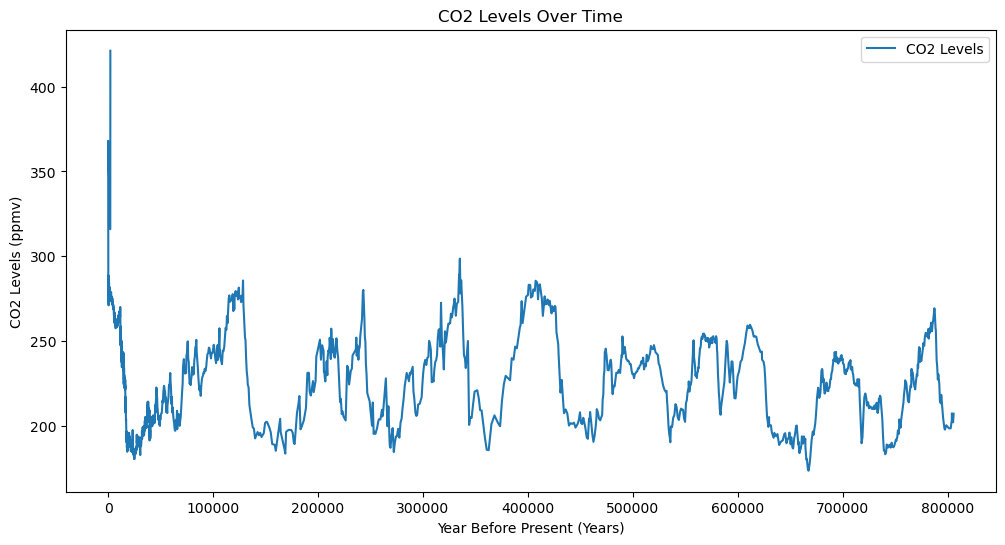

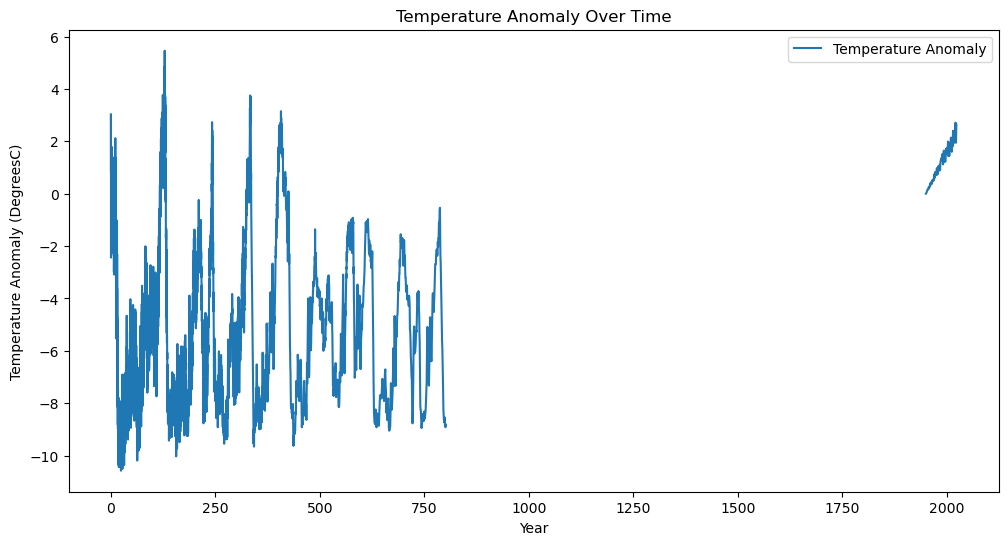

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

co2_df = pd.read_csv('fusedco2.csv')
co2_column_name = 'YearBP'
co2_data_column_name = 'Mean'

temp_df = pd.read_csv('TTEMP.csv')
temp_column_name = 'Year'
temp_data_column_name = 'DegreesC'

plt.figure(figsize=(12, 6))
plt.plot(co2_df[co2_column_name], co2_df[co2_data_column_name], label='CO2 Levels')
plt.title('CO2 Levels Over Time')
plt.xlabel('Year Before Present (Years)')
plt.ylabel('CO2 Levels (ppmv)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(temp_df[temp_column_name], temp_df[temp_data_column_name], label='Temperature Anomaly')
plt.title('Temperature Anomaly Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (DegreesC)')
plt.legend()
plt.show()


END
***

## Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue

/Users/gerball/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


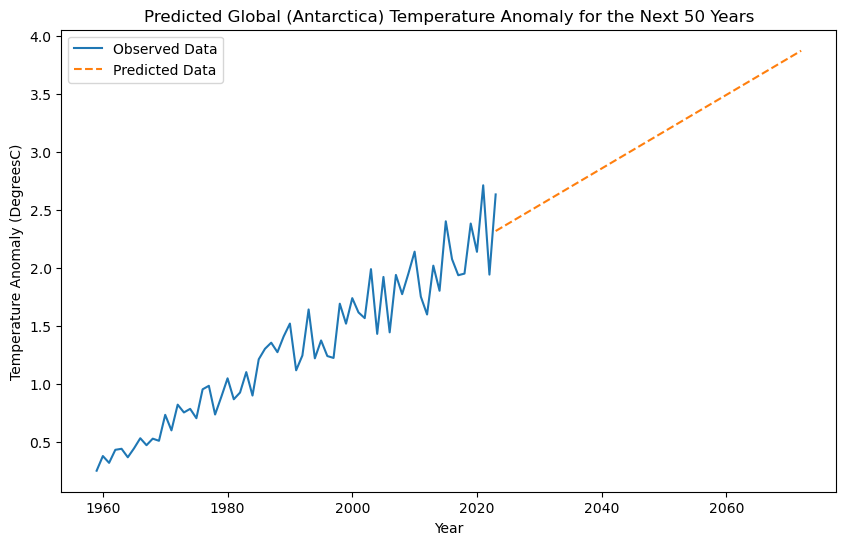

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

ttemp_df = pd.read_csv('TTEMP.csv')
year_column = 'Year'
temp_column = 'DegreesC'

observed_data = ttemp_df[(ttemp_df[year_column] >= 1959) & (ttemp_df[year_column] <= 2023)].copy()

model = LinearRegression()
model.fit(observed_data[[year_column]], observed_data[temp_column])

future_years = np.arange(2023, 2073).reshape(-1, 1)
predicted_temps = model.predict(future_years)

plt.figure(figsize=(10, 6))
plt.plot(observed_data[year_column], observed_data[temp_column], label='Observed Data')
plt.plot(future_years, predicted_temps, label='Predicted Data', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (DegreesC)')
plt.title('Predicted Global (Antarctica) Temperature Anomaly for the Next 50 Years')
plt.legend()
plt.show()


/Users/gerball/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


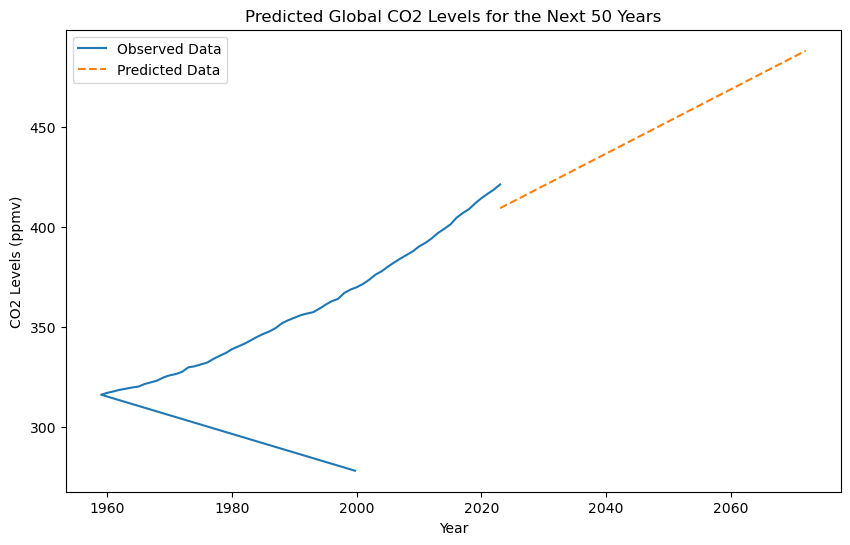

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

co2_df = pd.read_csv('fusedco2.csv')
year_column = 'YearBP'
co2_column = 'Mean'

observed_data = co2_df[(co2_df[year_column] >= 1959) & (co2_df[year_column] <= 2023)].copy()

model = LinearRegression()
model.fit(observed_data[[year_column]], observed_data[co2_column])

future_years = np.arange(2023, 2073).reshape(-1, 1)
predicted_co2 = model.predict(future_years)

plt.figure(figsize=(10, 6))
plt.plot(observed_data[year_column], observed_data[co2_column], label='Observed Data')
plt.plot(future_years, predicted_co2, label='Predicted Data', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('CO2 Levels (ppmv)')
plt.title('Predicted Global CO2 Levels for the Next 50 Years')
plt.legend()
plt.show()


> Future projection of climate change in 2050?
There are many different models but the overall (ish)
concensus is that the the Global temperature will warm by 1-2 degreesC by 2050 and 2-4 degrees Celsius (3.6-7.2 by 2100. My model above, which is based off of my fused 800000 yr temp data using linear Regrression - increases its mean temp by about 1.5 C - exactly in line with projections. 
As for co2, it is also projected to sharply rise. This is also in keeping with my data as co2 follows the temp graph over 800000 years quite cloesly. The last reading from the Manoa Loa dataset i gathered and fused was 420 ppm in 2023. According to projections, this is due to rise to over 600 by 2050, higher than my Linear Regression prediction has as it maxes out at approximately 500. 

>Sourcers - Theworldcounts
climate.copernicus.eu

END
***

## Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-
coverage

Commentary on  above phenpomenon;

As stated in the prior section on temperature and co2 50 year projections - warming in happening on a scale that we - humans - have never seen before. 